說明：

學生另有修習「迴歸分析」這門課，期中報告要自選數據做簡單線性迴歸模型分析。
該門課指定使用的程式工具以SAS為主，因此想用同一份數據以Python練習處理。

### 主題：2018年民主指數與人均國內生產毛額之簡單線性迴歸模型分析


之後的幾週有幾份加分題作業預計會跟著製作期中報告的進度推進，以此主題延續下去，將兩邊的製作過程比對結果是否會有差異，最後提出操作上的心得。

--

本週進度：原始資料處理、初步敘述性統計

--

第一步：先到網站上下載原始資料

--

變數說明：

x：2018年人均GDP(單位：國際元)

（2018 GDP per capita, current prices (Purchasing power parity; international dollars per capita)）

資料來源：國際貨幣基金組織《世界經濟展望》International Monetary Fund World Economic Outlook Database


y：2018年民主指數

資料來源：經濟學人信息社(Economist Intelligence Unit (EIU))--Democracy Index 2018: Me too？Political participation, protest and democracy

該指數衡量五個指標：選舉程序與多樣性、政府運作、政治參與、政治文化和公民自由。政權按得分分為「完全民主」（8至10分）、「部分民主」（6至7.9分）、「混合政權」（4至5.9分）和「專制政權」（低於4分）四類。

--

第二步：初步比對篩選資料後，存成csv檔

總共蒐集到225筆人均國內生產毛額與168筆民主指數資料，比對後刪除一些資料不齊全的國家後，最後留下155筆資料

--

第三步：將自己整理的csv檔叫來python處理

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
df1=pd.read_csv("迴歸分析原始資料.csv",encoding="big5")
df1.head()

#資料其實只有前三欄，但多出了幾欄Unnamed

,Country,2018 GDP,Democracy index,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Afghanistan,2025.472,2.97,NaN,NaN,NaN,NaN,NaN
1,Albania,13326.694,5.98,NaN,NaN,NaN,NaN,NaN
2,Algeria,15331.743,3.50,NaN,NaN,NaN,NaN,NaN
3,Angola,6851.272,3.62,NaN,NaN,NaN,NaN,NaN
4,Argentina,20551.043,7.02,NaN,NaN,NaN,NaN,NaN


In [21]:
#查詢解決方式後，因為Unnamed數目不多，先決定用drop將其去除

df2=df1.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5','Unnamed: 6','Unnamed: 7'],axis = 1)
df3=df2.drop([155,156,157,158,159,160])
df3

,Country,2018 GDP,Democracy index
0,Afghanistan,2025.472,2.97
1,Albania,13326.694,5.98
2,Algeria,15331.743,3.50
3,Angola,6851.272,3.62
4,Argentina,20551.043,7.02
5,Armenia,10273.434,4.79
6,Australia,52379.456,9.09
7,Austria,52172.116,8.29
8,Azerbaijan,18022.631,2.65
9,Bahrain,50048.506,2.71


第四步：先對變數進行敘述性統計


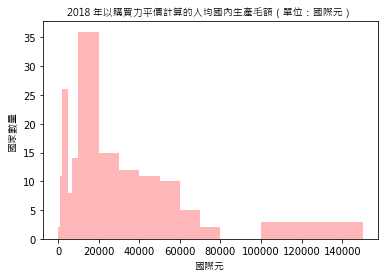

In [25]:
#x：2018年人均GDP
#畫出直方圖

plt.hist(df3['2018 GDP'],bins=[0,1000,2000,5000,7000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,150000],fc='#ffb6b9')
plt.xlabel("國際元",fontproperties="Microsoft JhengHei")
plt.ylabel("國家數量",fontproperties="Microsoft JhengHei")
plt.title("2018 年以購買力平價計算的人均國內生產毛額（單位：國際元）",fontproperties="Microsoft JhengHei")

plt.show()

In [32]:
#檢視x的平均數
np.mean(df3['2018 GDP'])

22379.224064516122

In [29]:
#檢視x的標準差
np.std(df3['2018 GDP'])

22762.49844262351

In [30]:
#檢視x的最大值
max(df3['2018 GDP'])

129638.44099999999

In [31]:
#檢視x的最小值
min(df3['2018 GDP'])

732.796

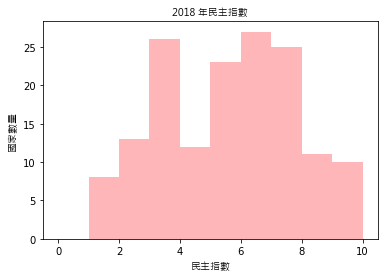

In [26]:
#y：2018年民主指數
#畫出直方圖

plt.hist(df3['Democracy index'],bins=[0,1,2,3,4,5,6,7,8,9,10],fc='#ffb6b9')
plt.xlabel("民主指數",fontproperties="Microsoft JhengHei")
plt.ylabel("國家數量",fontproperties="Microsoft JhengHei")
plt.title("2018 年民主指數",fontproperties="Microsoft JhengHei")

plt.show()

In [33]:
#檢視y的平均數
np.mean(df3['Democracy index'])

5.603677419354841

In [34]:
#檢視y的標準差
np.std(df3['Democracy index'])

2.1500052571143042

In [35]:
#檢視y的最大值
max(df3['Democracy index'])

9.87

In [36]:
#檢視y的最小值
min(df3['Democracy index'])

1.52

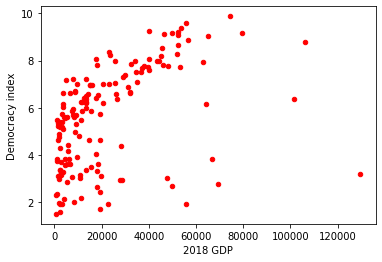

In [37]:
#再畫出散佈圖用直觀方式檢視分布情況

df3.plot(x='2018 GDP',y='Democracy index',kind='scatter',fc='red')
plt.show()